In [ ]:
#Data from Hsin-Yu Chen Observational selection effects with ground-based GW detectors 
#http://dx.doi.org/10.3847/1538-4357/835/1/31

In [2]:
%matplotlib inline
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import astropy
import sys
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.table import Table
import matplotlib.cm as cm
import math

In [3]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

In [4]:
#Color scale for maps
cool_cmap = cm.jet
cool_cmap.set_under("w")

In [ ]:
#Read data
t = Table.read('../BNS-MergerRates/skyprior_cbc_hl.fits')
print(t)

In [5]:
chenMap=hp.read_map('../BNS-MergerRates/skyprior_cbc_hl.fits')

NSIDE = 128
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


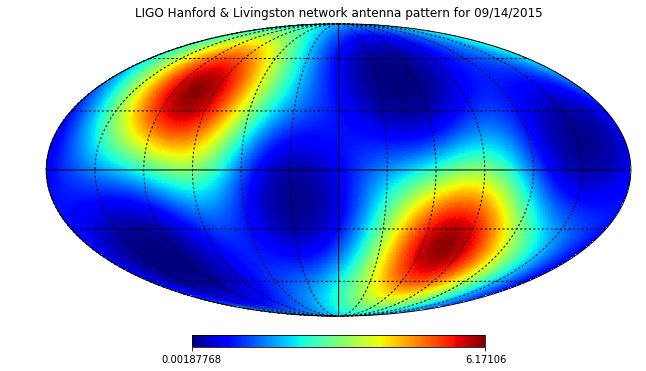

In [5]:
#Map of antenna pattern September 14 2015 at 00:29
hp.mollview(chenMap, title="LIGO Hanford & Livingston network antenna pattern for 09/14/2015",flip='geo',cmap=cool_cmap)
hp.graticule()

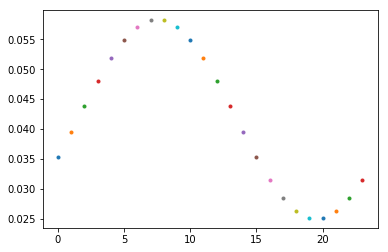

In [6]:
#Probability of operation for daily cycle, assuming 50% of 
time=np.arange(24)
fig=plt.figure()
ax=fig.add_subplot(111)
for i in time:
    p=(1+0.4*math.sin((2*np.pi*i/24)-(np.pi/8)))/24
    ax.plot(i,p,'.')
plt.show()

In [7]:
#Create discrete probability of operation array 
pOperation=[]
for i in time:
    p=(1/12)*(1+0.4*math.sin((np.pi*i/12)-(np.pi/8)))
    pOperation=np.append(pOperation,p)

In [8]:
#Transform pixel to angle in ChenMap
ipix=np.arange(len(chenMap))
theta,phi=hp.pixelfunc.pix2ang(128, ipix)

In [9]:
#Function to rotate map
def rotateMap(angle):
    r=hp.rotator.Rotator(rot=((1/12)*angle*np.pi,0,0), deg=False, eulertype='ZYX')
    theta2,phi2=r(theta,phi)
    jpix=hp.pixelfunc.ang2pix(128,theta2,phi2)
    mymap=chenMap[jpix]*pOperation[angle]
    return mymap

/Users/KarenPerezSarmiento/Library/Python/3.5/lib/python/site-packages/healpy/projaxes.py:859: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


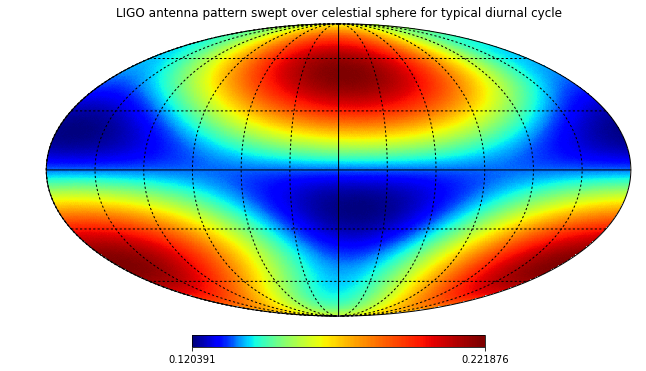

In [10]:
fontsize=15
sumMap=chenMap*pOperation[0]
for i in range(1,24):
    sumMap=sumMap+rotateMap(i)
dayMap=sumMap/24
hp.mollview(dayMap, title="LIGO antenna pattern swept over celestial sphere for typical diurnal cycle",flip='geo',cmap=cool_cmap,norm='hist')
plt.rcParams.update({'font.size':fontsize})
hp.graticule()

In [6]:
rotatedMap1=hp.read_map("skyprior_cbc_hl_2017may_sin0.400_0.125pi_fine_twilight.fits")

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


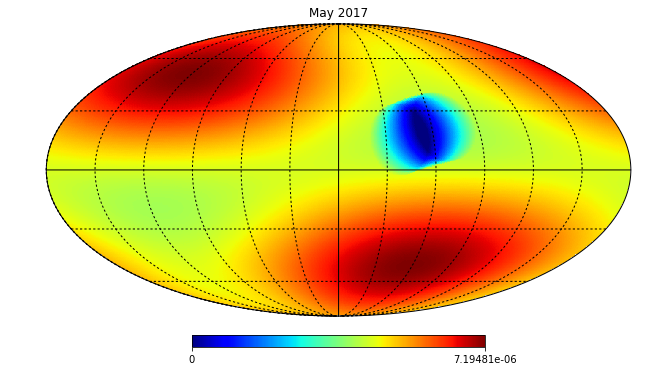

In [84]:
kmap=hp.mollview(rotatedMap1, title="May 2017",flip='geo',cmap=cool_cmap,return_projected_map=True)
hp.graticule()

hp.px2ang(320000,kmap

In [110]:
kmap[]

masked_array(data = [            -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -